In [1]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
# create generic path. using 
raw_data_path = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'data','raw'))
processed_data_path = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'data','processed'))
interim_data_path = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'data','interim'))
print(raw_data_path)
print(processed_data_path)
print(interim_data_path)

G:\Git Projects\Toxicity_Classification\data\raw
G:\Git Projects\Toxicity_Classification\data\processed
G:\Git Projects\Toxicity_Classification\data\interim


In [3]:
# Loading data into dataframe
df = pd.read_csv(os.path.abspath(os.path.join(raw_data_path,'train.csv')))

In [4]:
# having a look at data
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


1. Target: toxic, severe_toxic, obscene, threat, insult, identity hate
2. id: unique identifier (unwanted)
3. comment text: contains stray like \n. Remaining strays are to be found out and filtered accordingly

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


There are 159571 rows

In [6]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

There are no null values found

In [7]:
# dropping column id
df.drop('id', axis=1, inplace=True)
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
# Lets check comment_text_column


In [9]:
# Create unacceptable column
def get_unacceptable( toxic, severe_toxic, obscene, threat, insult, identity_hate):
    if (toxic+severe_toxic+obscene+threat+insult+identity_hate) > 1:
        return 1
    else:
        return 0

In [10]:
df['unacceptable'] = df.apply(lambda x:get_unacceptable(    x['toxic'], x['severe_toxic'],    x['obscene'], x['threat'],     x['insult'], x['identity_hate']),axis=1)

In [11]:
df_toxic = df[df['unacceptable']==1]
df_notoxic = df[df['unacceptable']==0]

In [12]:
toxic = ' '.join(df_toxic['comment_text'])
nontoxic = ' '.join(df_notoxic['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

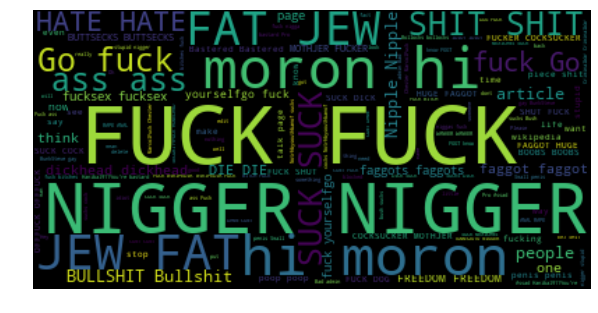

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(toxic)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

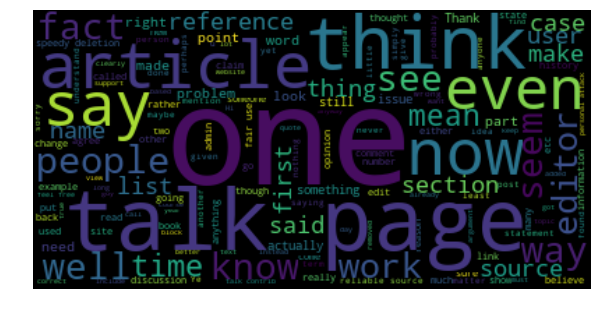

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(nontoxic)
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")

In [15]:
toxic_symbols = (list(re.findall('\W',toxic)))
print("toxic comments have {} symbols and {} unique symbols\n % of * is {} \n% of $ is {}".format(len(toxic_symbols),len(set(toxic_symbols)),(toxic_symbols.count('*')/len(toxic_symbols)),(toxic_symbols.count('$')/len(toxic_symbols))))
nontoxic_symbols = (list(re.findall('\W',nontoxic)))
print(" non toxic comments have {} symbols and {} unique symbols\n % of * is {} \n% of $ is {}".format(len(nontoxic_symbols),len(set(nontoxic_symbols)),(nontoxic_symbols.count('*')/len(nontoxic_symbols)),(nontoxic_symbols.count('$')/len(nontoxic_symbols))))

toxic comments have 628680 symbols and 111 unique symbols
 % of * is 0.0015158745307628683 
% of $ is 0.00024813895781637717
 non toxic comments have 13160607 symbols and 516 unique symbols
 % of * is 0.0003284043053637268 
% of $ is 6.23831408384127e-05


In [16]:
# stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# stemming with snowball stemmer
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

In [17]:
def preprocessing(text):
    '''
    Preprocessing text
    '''
    
    # lower case
    # trim / strip whitespace
    # stop words removal
    # stemming
    # retain words only above length 2
    # retain only letters and numbers
    
    text = re.sub('\W',' ',text)
    text = ' '.join([snowball_stemmer.stem(i.strip().lower()) for i in list(text.split()) if (len(i)>2 and i not in stop_words)])
    return text

In [18]:
df['comments_refined'] = df['comment_text'].map(lambda x: preprocessing(x))

In [19]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,unacceptable,comments_refined
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explan whi edit made usernam hardcor metallica...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,aww match background colour seem stuck thank t...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,hey man realli tri edit war guy constant remov...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,more make real suggest improv wonder section s...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,you sir hero ani chanc rememb page


# Model Creation and results


In [20]:
# Create X and y
X = df['comments_refined']
y = df['unacceptable']

In [21]:
# Find whether class in imbalanced
df.unacceptable.value_counts()/len(df.unacceptable)

0    0.938178
1    0.061822
Name: unacceptable, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling  import TomekLinks
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [24]:
tfv = TfidfVectorizer(ngram_range=(1,2))

In [98]:
x_train_vect = tfv.fit_transform(X_train)

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [27]:
# data resampling
sm = TomekLinks()

X_ov, y_ov = sm.fit_resample(x_train_vect, y_train)

In [28]:
nb =  LogisticRegression()
rf = RandomForestClassifier()
lsvc = LinearSVC()

In [29]:
# fit model and predict
nb.fit(X_ov,y_ov)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred = nb.predict(tfv.transform(X_test))

In [31]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     44914
           1       0.90      0.59      0.72      2958

   micro avg       0.97      0.97      0.97     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.97      0.97      0.97     47872

Accuracy:: 0.9707971256684492


In [32]:
# random forest
# fit model and predict
rf.fit(X_ov,y_ov)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_pred = rf.predict(tfv.transform(X_test))

In [34]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     44914
           1       0.90      0.52      0.66      2958

   micro avg       0.97      0.97      0.97     47872
   macro avg       0.93      0.76      0.82     47872
weighted avg       0.96      0.97      0.96     47872

Accuracy:: 0.9668282085561497


In [35]:
lsvc.fit(X_ov,y_ov)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [36]:
y_pred = lsvc.predict(tfv.transform(X_test))

In [37]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     44914
           1       0.85      0.72      0.78      2958

   micro avg       0.97      0.97      0.97     47872
   macro avg       0.91      0.86      0.88     47872
weighted avg       0.97      0.97      0.97     47872

Accuracy:: 0.9748495989304813


In [38]:
from imblearn.under_sampling import RandomUnderSampler
# data resampling
sm = RandomUnderSampler()

X_ov, y_ov = sm.fit_resample(x_train_vect, y_train)

In [39]:
lsvc.fit(X_ov,y_ov)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [40]:
y_pred = lsvc.predict(tfv.transform(X_test))

In [41]:
from sklearn.metrics.classification import classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict
print(classification_report(y_test,y_pred))
print("Accuracy::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     44914
           1       0.54      0.92      0.68      2958

   micro avg       0.95      0.95      0.95     47872
   macro avg       0.77      0.93      0.83     47872
weighted avg       0.97      0.95      0.95     47872

Accuracy:: 0.9470462901069518


In [42]:
from imblearn.over_sampling import SVMSMOTE

In [43]:
# Check for unique words present only in toxic comments
toxic_array = toxic.split()
nontoxic_array = nontoxic.split()

In [44]:
train_df = pd.concat([X_train,y_train],axis=1)
toxic_train = ' '.join(train_df[train_df['unacceptable']==1]['comments_refined'])
nontoxic_train = ' '.join(train_df[train_df['unacceptable']==0]['comments_refined'])

In [45]:
toxic_set = set(toxic_train.split())
nontoxic_set = set(nontoxic_train.split())

In [47]:
toxic_certain = [i for i in toxic_set if i not in nontoxic_set]

In [52]:
def toxic_test(text):
    if any(i in text.split() for i in toxic_certain):
           return 1
    return 0

In [54]:
test_df = pd.concat([X_test,y_test],axis=1)
test_df['toxic_rule'] = test_df['comments_refined'].map(lambda x: toxic_test(x))

In [55]:
test_df.head()

,comments_refined,unacceptable,toxic_rule
74251,paraphras gari you complain prefer recent sour...,0,0
131406,block rever block rever block rever block reve...,0,0
120969,sorri like unreserv retract previous statement...,0,0
121827,know exact like press releas use sourc http tv...,0,0
4771,thank improv wikipedia 2007 dear thank warm wi...,0,0


In [57]:
test_df['ml_output'] = y_pred
test_df['combined'] = test_df['ml_output']+test_df['toxic_rule']


In [59]:
test_df['combined']=[1 if i>0 else 1 for i in test_df['combined']]

In [61]:
test_df.head()

,comments_refined,unacceptable,toxic_rule,ml_output,combined
74251,paraphras gari you complain prefer recent sour...,0,0,0,1
131406,block rever block rever block rever block reve...,0,0,0,1
120969,sorri like unreserv retract previous statement...,0,0,1,1
121827,know exact like press releas use sourc http tv...,0,0,0,1
4771,thank improv wikipedia 2007 dear thank warm wi...,0,0,0,1


In [63]:
print(classification_report(list(test_df['unacceptable']),list(test_df['combined'])))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     44914
           1       0.06      1.00      0.12      2958

   micro avg       0.06      0.06      0.06     47872
   macro avg       0.03      0.50      0.06     47872
weighted avg       0.00      0.06      0.01     47872



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
from sklearn.multiclass import OneVsRestClassifier

In [69]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,unacceptable,comments_refined
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explan whi edit made usernam hardcor metallica...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,aww match background colour seem stuck thank t...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,hey man realli tri edit war guy constant remov...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,more make real suggest improv wonder section s...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,you sir hero ani chanc rememb page


In [72]:
X_train.head()

104158    actual know use account anymor alway tri good ...
81146     the problem disambig michael link event histor...
6248      legalleft guess sarcasm one characterist devel...
36126     pleas note right free speech wikipedia privat ...
70143     boba phat afd afd particip month ago done http...
Name: comments_refined, dtype: object

In [124]:
ym_train = pd.DataFrame(X_train).merge(df, how='left',left_index=True, right_index=True)
ym_test = pd.DataFrame(X_test).merge(df, how='left',left_index=True, right_index=True)

In [125]:
ym_train.drop(['comments_refined_x','comments_refined_y','comment_text'],axis=1,inplace=True)
ym_test.drop(['comments_refined_x','comments_refined_y','comment_text'],axis=1,inplace=True)

In [126]:
X_tm, y_tm = sm.fit_resample(x_train_vect,np.array(ym_train))

In [129]:
ovr = OneVsRestClassifier(lsvc)

In [131]:
ovr.fit(X_tm,y_tm)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=None)

In [132]:
ym_pred = ovr.predict(tfv.transform(X_test))

In [133]:
from sklearn.metrics import roc_auc_score

In [134]:
roc_auc_score(ym_test,ym_pred)

0.499494977848076

In [136]:
nb.fit(X_tm,y_tm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: bad input shape (95, 5)